In [5]:
import pandas as pd

bladder = pd.read_csv('bladder.csv')
print(bladder)

     id  rx  number  size  stop  event  enum
0     1   1       1     3     1      0     1
1     1   1       1     3     1      0     2
2     1   1       1     3     1      0     3
3     1   1       1     3     1      0     4
4     2   1       2     1     4      0     1
..   ..  ..     ...   ...   ...    ...   ...
335  84   2       2     1    54      0     4
336  85   2       1     3    59      0     1
337  85   2       1     3    59      0     2
338  85   2       1     3    59      0     3
339  85   2       1     3    59      0     4

[340 rows x 7 columns]


In [6]:
print(bladder['rx'].value_counts())


rx
1    188
2    152
Name: count, dtype: int64


In [7]:
#to perform survival analysis , we import KAPLANMEIRERFITTER() function from Lifelines library

In [8]:
from lifelines import KaplanMeierFitter

In [9]:
from lifelines import KaplanMeierFitter

kmf= KaplanMeierFitter()
kmf.fit(bladder['stop'],event_observed= bladder['event'])


#time to event data

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 340 total observations, 228 right-censored observations>

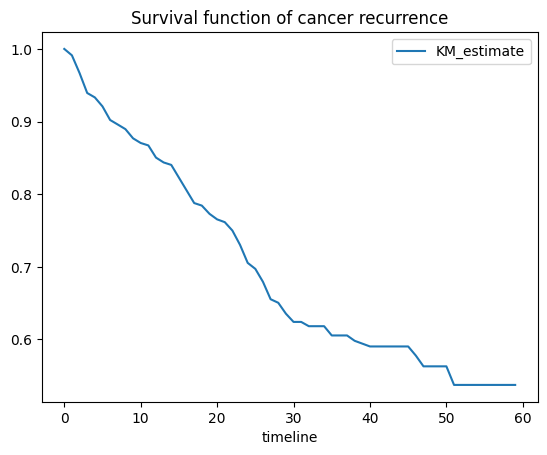

In [10]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
kmf.survival_function_.plot(ax=ax)
ax.set_title('Survival function of cancer recurrence')
plt.show()

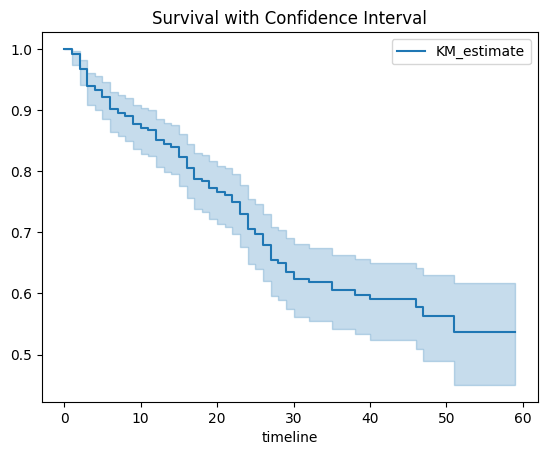

In [11]:
fig,ax = plt.subplots()
kmf.plot(ax=ax)
ax.set_title('Survival with Confidence Interval')
plt.show()

In [12]:
#coxphfitter() class from lifelines

from lifelines import CoxPHFitter
cph=CoxPHFitter()

#pass in the columns to be used as predictors

cph_bladder_df= bladder[["rx","number","size","enum","stop","event"]]
cph.fit(cph_bladder_df, duration_col="stop", event_col ="event")
#print coefficients
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>
             duration col = 'stop'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 340
number of events observed = 112
   partial log-likelihood = -565.66
         time fit was run = 2025-04-10 23:55:43 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
rx        -0.60      0.55      0.20           -0.99           -0.20                0.37                0.82
number     0.22      1.24      0.05            0.13            0.31                1.13                1.36
size      -0.06      0.94      0.07           -0.20            0.08                0.82                1.09
enum      -0.60      0.55      0.09           -0.79           -0.42                0.45                0.66

           cmp to     z      p  -log2(p)
covariate                               
rx           0.00 -2.97 <0.005      8.41
number       0.00  4.68 <0.005     18.38
size         0.00 -0.80   0.42      1.24
enum         0.00 -6.42 <0.005     32.80
---
Concordance = 0.75
Partial AIC = 1139.32
log-likelihood ratio test = 67.21 on 4 df
-log2(p) of ll-ratio test = 43.37

In [ ]:
#survival curve by Strata
#Rx column , we plot separate  curve for each treatment. , if the log(-Log(survival curve)) verses 

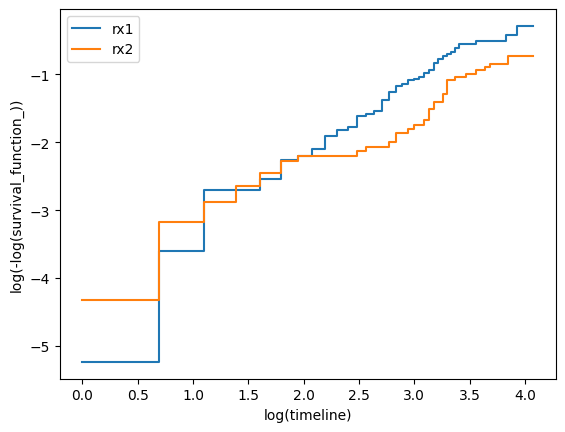

In [22]:
rx1 = bladder.loc[bladder['rx']==1]
rx2 = bladder.loc[bladder['rx']==2]
kmf1 = KaplanMeierFitter()
kmf1.fit(rx1['stop'],event_observed=rx1['event'])
kmf2 = KaplanMeierFitter()
kmf2.fit(rx2['stop'],event_observed=rx2['event'])
fig,axes = plt.subplots()
#put both plots on the same axis

kmf1.plot_loglogs(ax=axes)
kmf2.plot_loglogs(ax=axes)
axes.legend(['rx1','rx2'])
plt.show()


In [ ]:
#if lines cross each other, it make sense to stratify our analysis

In [24]:
cph_strat =CoxPHFitter()
cph_strat.fit(cph_bladder_df, duration_col = "stop", event_col="event",strata=["rx"],)
cph_strat.print_summary()

<lifelines.CoxPHFitter: fitted with 340 total observations, 228 right-censored observations>
             duration col = 'stop'
                event col = 'event'
                   strata = rx
      baseline estimation = breslow
   number of observations = 340
number of events observed = 112
   partial log-likelihood = -493.52
         time fit was run = 2025-04-11 00:05:11 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
number     0.21      1.24      0.05            0.12            0.30                1.13                1.36
size      -0.05      0.95      0.07           -0.19            0.08                0.82                1.09
enum      -0.61      0.55      0.09           -0.79           -0.42                0.45                0.66

           cmp to     z      p  -log2(p)
covariate                               
number       0.00  4.60 <0.005     17.84
size         0.00 -0.77   0.44      1.19
enum         0.00 -6.45 <0.005     33.07
---
Concordance = 0.74
Partial AIC = 993.04
log-likelihood ratio test = 61.84 on 3 df
-log2(p) of ll-ratio test = 41.93